# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

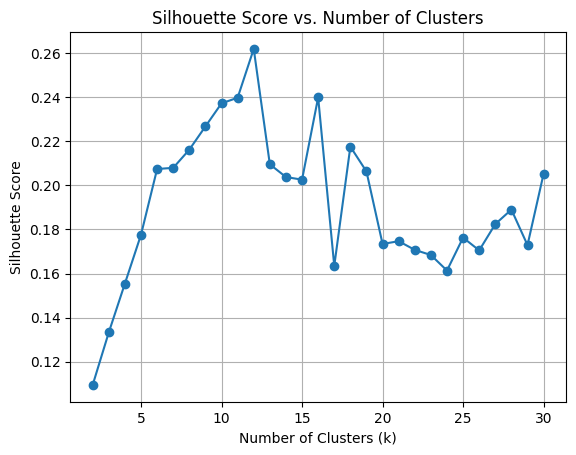

Optimal number of clusters (k): 12


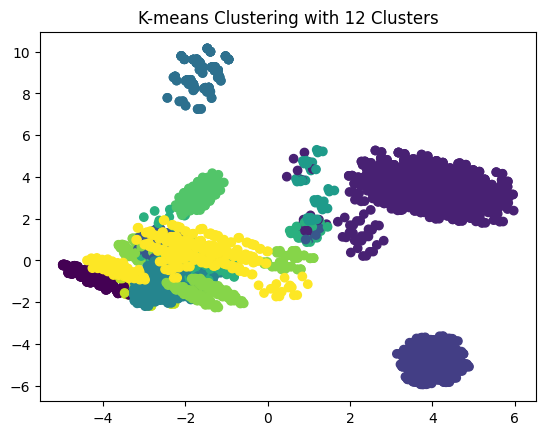

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load and preprocess the data (similar to the previous code you provided)
mushroom_data = pd.read_csv('agaricus-lepiota.data')
x = mushroom_data.drop(['edibility'], axis=1)
x = pd.get_dummies(x)

# Scale the data using StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Initialize lists to store Silhouette Scores and k values
silhouette_scores = []
k_values = range(2, 31)  # Test k values from 2 to 30

# Iterate over different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    y_kmeans = kmeans.predict(x_scaled)
    silhouette = silhouette_score(x_scaled, y_kmeans)
    silhouette_scores.append(silhouette)

# Plot Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()

# Choose the optimal k based on the plot
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (k): {optimal_k}')

# Visualize the clusters with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(x_scaled)
y_kmeans = kmeans.predict(x_scaled)

# Perform PCA for dimensionality reduction and visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Plot the clusters
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.show()